### Author: Vidya Prabhu

##### Problem: The goal is to solve a binary classification problem where the task is to predict whether a YouTube video is an official music video or not. The target variable for this prediction is the official_video column, which has two possible values (Yes or No). Algorithms like Random Forest, Decision Tree, and Gradient Boosting will be used to model this problem, leveraging features such as Likes, Comments, Views, and various audio characteristics like Danceability, Energy, and Tempo. These features will help identify patterns that differentiate official music videos from non-official ones.

In [616]:
#importing pandas as numpy
import pandas as pd
import numpy as np

In [617]:
# reading a csv file
df= pd.read_csv('Spotify_Youtube.csv')

In [618]:
#displaying 10 records
df.head(10)

,Unnamed: 0,Artist,Url_spotify,Track,Album,Album_type,Uri,Danceability,Energy,Key,...,Url_youtube,Title,Channel,Views,Likes,Comments,Description,Licensed,official_video,Stream
0,0,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Feel Good Inc.,Demon Days,album,spotify:track:0d28khcov6AiegSCpG5TuT,0.818,0.705,6.0,...,https://www.youtube.com/watch?v=HyHNuVaZJ-k,Gorillaz - Feel Good Inc. (Official Video),Gorillaz,693555221.0,6220896.0,169907.0,Official HD Video for Gorillaz' fantastic trac...,True,True,1.040235e+09
1,1,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Rhinestone Eyes,Plastic Beach,album,spotify:track:1foMv2HQwfQ2vntFf9HFeG,0.676,0.703,8.0,...,https://www.youtube.com/watch?v=yYDmaexVHic,Gorillaz - Rhinestone Eyes [Storyboard Film] (...,Gorillaz,72011645.0,1079128.0,31003.0,The official video for Gorillaz - Rhinestone E...,True,True,3.100837e+08
2,2,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown),New Gold (feat. Tame Impala and Bootie Brown),single,spotify:track:64dLd6rVqDLtkXFYrEUHIU,0.695,0.923,1.0,...,https://www.youtube.com/watch?v=qJa-VFwPpYA,Gorillaz - New Gold ft. Tame Impala & Bootie B...,Gorillaz,8435055.0,282142.0,7399.0,Gorillaz - New Gold ft. Tame Impala & Bootie B...,True,True,6.306347e+07
3,3,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,On Melancholy Hill,Plastic Beach,album,spotify:track:0q6LuUqGLUiCPP1cbdwFs3,0.689,0.739,2.0,...,https://www.youtube.com/watch?v=04mfKJWDSzI,Gorillaz - On Melancholy Hill (Official Video),Gorillaz,211754952.0,1788577.0,55229.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,4.346636e+08
4,4,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Clint Eastwood,Gorillaz,album,spotify:track:7yMiX7n9SBvadzox8T5jzT,0.663,0.694,10.0,...,https://www.youtube.com/watch?v=1V_xRb0x9aw,Gorillaz - Clint Eastwood (Official Video),Gorillaz,618480958.0,6197318.0,155930.0,The official music video for Gorillaz - Clint ...,True,True,6.172597e+08
5,5,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,DARE,Demon Days,album,spotify:track:4Hff1IjRbLGeLgFgxvHflk,0.760,0.891,11.0,...,https://www.youtube.com/watch?v=uAOR6ib95kQ,Gorillaz - DARE (Official Video),Gorillaz,259021161.0,1844658.0,72008.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,3.238503e+08
6,6,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,New Gold (feat. Tame Impala and Bootie Brown) ...,New Gold (feat. Tame Impala and Bootie Brown) ...,single,spotify:track:2c3KCGq6UojB2c8UAFrRON,0.716,0.897,4.0,...,https://www.youtube.com/watch?v=BONNm0F7Tto,"Gorillaz - New Gold ft. Tame Impala, Bootie Br...",Dom Dolla,451996.0,11686.0,241.0,"Gorillaz 'New Gold' ft. Tame Impala, Bootie Br...",False,True,1.066615e+07
7,7,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,She's My Collar (feat. Kali Uchis),Humanz (Deluxe),album,spotify:track:3lIxtCaROdRDuTnNBDm3n2,0.726,0.815,11.0,...,https://www.youtube.com/watch?v=f8NwLXYIHS4,Gorillaz - She's My Collar [HQ],SalvaMuñox,1010982.0,17675.0,260.0,𝐁̲𝐎̲𝐍̲𝐔̲𝐒̲:̲ Hu̳ma̳n̳z [̲̠̲𝐃̲̠̲𝐄̲̠̲𝐅̲̠̲𝐈̲̠̲𝐍̲̠...,False,False,1.596059e+08
8,8,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Cracker Island (feat. Thundercat),Cracker Island (feat. Thundercat),single,spotify:track:2W3ZpQg9i6lE6kmHbcdu9N,0.741,0.913,2.0,...,https://www.youtube.com/watch?v=S03T47hapAc,Gorillaz - Cracker Island ft. Thundercat (Offi...,Gorillaz,24459820.0,739527.0,20296.0,Listen to Cracker Island: https://gorillaz.lnk...,True,True,4.267190e+07
9,9,Gorillaz,https://open.spotify.com/artist/3AA28KZvwAUcZu...,Dirty Harry,Demon Days,album,spotify:track:2bfGNzdiRa1jXZRdfssSzR,0.625,0.877,10.0,...,https://www.youtube.com/watch?v=cLnkQAeMbIM,Gorillaz - Dirty Harry (Official Video),Gorillaz,154761056.0,1386920.0,39240.0,Follow Gorillaz online:\nhttp://gorillaz.com \...,True,True,1.910747e+08


In [619]:
df.columns

Index(['Unnamed: 0', 'Artist', 'Url_spotify', 'Track', 'Album', 'Album_type',
       'Uri', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Liveness', 'Valence', 'Tempo',
       'Duration_ms', 'Url_youtube', 'Title', 'Channel', 'Views', 'Likes',
       'Comments', 'Description', 'Licensed', 'official_video', 'Stream'],
      dtype='object')

In [620]:
# Checking for null values and data types
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20718 entries, 0 to 20717
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        20718 non-null  int64  
 1   Artist            20718 non-null  object 
 2   Url_spotify       20718 non-null  object 
 3   Track             20718 non-null  object 
 4   Album             20718 non-null  object 
 5   Album_type        20718 non-null  object 
 6   Uri               20718 non-null  object 
 7   Danceability      20716 non-null  float64
 8   Energy            20716 non-null  float64
 9   Key               20716 non-null  float64
 10  Loudness          20716 non-null  float64
 11  Speechiness       20716 non-null  float64
 12  Acousticness      20716 non-null  float64
 13  Instrumentalness  20716 non-null  float64
 14  Liveness          20716 non-null  float64
 15  Valence           20716 non-null  float64
 16  Tempo             20716 non-null  float6

### Cleaning the data

##### Dealing with Null Values

In [621]:
# Imputing missing values for numerical columns with median
df['Danceability'] = df['Danceability'].fillna(df['Danceability'].median())
df['Energy'] = df['Energy'].fillna(df['Energy'].median())

# Imputing missing categorical columns with mode or default value
df['Licensed'] = df['Licensed'].fillna(False)
# Imputing missing values with False (or 0) for 'official_video'
df['official_video'] = df['official_video'].fillna(False) 

# Dropping columns with too many missing values
df_cleaned = df.drop(columns=['Url_youtube', 'Title', 'Channel'])

# Optionally dropping rows with any remaining missing values
df_cleaned = df_cleaned.dropna()

In [622]:
# Ensuring no duplicates
df_cleaned = df_cleaned.drop_duplicates()

# Checking the result
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19170 entries, 0 to 20717
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        19170 non-null  int64  
 1   Artist            19170 non-null  object 
 2   Url_spotify       19170 non-null  object 
 3   Track             19170 non-null  object 
 4   Album             19170 non-null  object 
 5   Album_type        19170 non-null  object 
 6   Uri               19170 non-null  object 
 7   Danceability      19170 non-null  float64
 8   Energy            19170 non-null  float64
 9   Key               19170 non-null  float64
 10  Loudness          19170 non-null  float64
 11  Speechiness       19170 non-null  float64
 12  Acousticness      19170 non-null  float64
 13  Instrumentalness  19170 non-null  float64
 14  Liveness          19170 non-null  float64
 15  Valence           19170 non-null  float64
 16  Tempo             19170 non-null  float64
 17

In [623]:
#Checking if there is any null values again
print(df_cleaned.isnull().sum())

Unnamed: 0          0
Artist              0
Url_spotify         0
Track               0
Album               0
Album_type          0
Uri                 0
Danceability        0
Energy              0
Key                 0
Loudness            0
Speechiness         0
Acousticness        0
Instrumentalness    0
Liveness            0
Valence             0
Tempo               0
Duration_ms         0
Views               0
Likes               0
Comments            0
Description         0
Licensed            0
official_video      0
Stream              0
dtype: int64


In [624]:
# Dropping the unnamed column
df_cleaned = df_cleaned.drop(columns=["Unnamed: 0"])

In [625]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19170 entries, 0 to 20717
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Artist            19170 non-null  object 
 1   Url_spotify       19170 non-null  object 
 2   Track             19170 non-null  object 
 3   Album             19170 non-null  object 
 4   Album_type        19170 non-null  object 
 5   Uri               19170 non-null  object 
 6   Danceability      19170 non-null  float64
 7   Energy            19170 non-null  float64
 8   Key               19170 non-null  float64
 9   Loudness          19170 non-null  float64
 10  Speechiness       19170 non-null  float64
 11  Acousticness      19170 non-null  float64
 12  Instrumentalness  19170 non-null  float64
 13  Liveness          19170 non-null  float64
 14  Valence           19170 non-null  float64
 15  Tempo             19170 non-null  float64
 16  Duration_ms       19170 non-null  float64
 17

### Descriptive Statistics (10 Columns)

###### I am using "Official_Video" as the label column. It indicates whether the song has an official video or not, and my goal is to predict this based on other features in the dataset that are included below: 
###### 1. "Danceability" reflects how suitable a track is for dancing, based on rhythm and tempo.
###### 2. "Energy" measures the intensity and activity of a track, which can influence how engaging or popular the song is.
###### 3. "Loudness" measures numerical feature representing the track's overall volume.
###### 4. "Likes" count on platforms like YouTube or Spotify is a measure of popularity and engagement.
###### 5. "Views" another metric related to the song's popularity, indicating how many people have viewed the song's video or track. 
###### 6. "Comments" count measures audience interaction and engagement
###### 7. "Stream" count is a critical indicator of the song’s popularity and market success
###### 8. "Duration_ms" (duration in milliseconds) of a track could play a role in whether a song receives an official video.
###### 9. "Liveness" This indicates the probability of the track being recorded in a live setting
###### 10."Tempo" This refers to the speed or pace of a piece of music, measured in beats per minute (BPM).

In [626]:
# List of columns to include
selected_columns = [
    'official_video',  # Boolean
    'Licensed',        # Boolean
    'Danceability',    # Numerical
    'Energy',          # Numerical
    'Loudness',        # Numerical
    'Likes',           # Numerical
    'Views',           # Numerical
    'Comments',        # Numerical
    'Stream',          # Numerical
    'Duration_ms',     # Numerical
    'Liveness',        # Numerical
    'Tempo',           # Numerical
]

In [627]:
# Filtering dataset to only include the selected columns
filtered_df = df_cleaned[selected_columns]

In [628]:
# Planning to use Official_Video and Licensed as a label column so changing the format to bool (As it is better for machine Learning )
filtered_df = filtered_df.copy()
filtered_df['official_video'] = filtered_df['official_video'].astype(bool)
filtered_df['Licensed'] = filtered_df['Licensed'].astype(bool)

In [629]:
print(filtered_df.shape)

(19170, 12)


In [630]:
#Descriptive statistics
filtered_df.describe()

,Danceability,Energy,Loudness,Likes,Views,Comments,Stream,Duration_ms,Liveness,Tempo
count,19170.000000,19170.000000,19170.000000,1.917000e+04,1.917000e+04,1.917000e+04,1.917000e+04,1.917000e+04,19170.000000,19170.000000
mean,0.621178,0.636150,-7.615305,6.823531e+05,9.719768e+07,2.838656e+04,1.382746e+08,2.247612e+05,0.191322,120.607345
std,0.165533,0.213439,4.617605,1.820550e+06,2.799997e+08,1.977979e+05,2.477309e+08,1.278468e+05,0.165217,29.588308
min,0.000000,0.000020,-46.251000,0.000000e+00,2.600000e+01,0.000000e+00,6.574000e+03,3.098500e+04,0.014500,0.000000
25%,0.520000,0.510000,-8.745000,2.447350e+04,2.070213e+06,5.830000e+02,1.786937e+07,1.802670e+05,0.094100,96.997500
50%,0.639000,0.667000,-6.504000,1.332770e+05,1.568959e+07,3.515500e+03,5.037938e+07,2.133210e+05,0.125000,119.969000
75%,0.742000,0.798000,-4.918500,5.423462e+05,7.369040e+07,1.494100e+04,1.407579e+08,2.519630e+05,0.234000,139.946000
max,0.975000,1.000000,0.920000,5.078865e+07,8.079649e+09,1.608314e+07,3.386520e+09,4.676058e+06,1.000000,243.372000


In [631]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19170 entries, 0 to 20717
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   official_video  19170 non-null  bool   
 1   Licensed        19170 non-null  bool   
 2   Danceability    19170 non-null  float64
 3   Energy          19170 non-null  float64
 4   Loudness        19170 non-null  float64
 5   Likes           19170 non-null  float64
 6   Views           19170 non-null  float64
 7   Comments        19170 non-null  float64
 8   Stream          19170 non-null  float64
 9   Duration_ms     19170 non-null  float64
 10  Liveness        19170 non-null  float64
 11  Tempo           19170 non-null  float64
dtypes: bool(2), float64(10)
memory usage: 1.6 MB


#### Preprocessing the data

In [632]:
#feature column in dataframe X 
#label column in y ((Official_video)

X = filtered_df.drop(columns = ['official_video'], inplace = False) #features columns
y = filtered_df['official_video'] #label column

#### Classification

##### Using  Random Forests, Decision Tree and Gradient Boosting classifier algorithms to model this classification problem

In [633]:
#importing necessary statements
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

In [634]:
# Splitting the dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=30)

In [635]:
#Initializing classifiers untrain models
dt_model = DecisionTreeClassifier(random_state=30)
rf_model = RandomForestClassifier(random_state=30)
gb_model = GradientBoostingClassifier(random_state=30)

In [636]:
#training the models by calling method fit
dt_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)
gb_model.fit(X_train, y_train)

GradientBoostingClassifier(random_state=30)

In [637]:
#making predictions using X_test as the input
dt_pred = dt_model.predict(X_test)
rf_pred = rf_model.predict(X_test)
gb_pred = gb_model.predict(X_test)

In [638]:
#Confusion Metrics comparison
print("Decision Tree confusion matrix:\n", confusion_matrix(y_test, dt_pred))
print("Random Forest confusion matrix:\n", confusion_matrix(y_test, rf_pred))
print("Gradient Boosting confusion matrix:\n",confusion_matrix(y_test, gb_pred)) 

Decision Tree confusion matrix:
 [[ 943  232]
 [ 228 4348]]
Random Forest confusion matrix:
 [[1091   84]
 [ 277 4299]]
Gradient Boosting confusion matrix:
 [[1089   86]
 [ 301 4275]]


In [639]:
#Decision Tree performance metrics(Out of sample)
print("Decision Tree's Accuracy: ", accuracy_score(y_test, dt_pred))
print("Decision Tree's precision score: ", precision_score(y_test, dt_pred))
print("Decision Tree's recall:", recall_score(y_test, dt_pred))
print("Decsision Tree's f1_score:", f1_score(y_test, dt_pred))

Decision Tree's Accuracy:  0.9200139106242393
Decision Tree's precision score:  0.9493449781659389
Decision Tree's recall: 0.9501748251748252
Decsision Tree's f1_score: 0.9497597204019222


In [640]:
#Random Forest performance metrics(Out of sample)
print("Random Forest's Accuracy:", accuracy_score(y_test, rf_pred))
print("Random Forest's precision score:", precision_score(y_test, rf_pred))
print("Random Forest's recall:", recall_score(y_test, rf_pred))
print("random Forest's f1_score:",f1_score(y_test,rf_pred))

Random Forest's Accuracy: 0.9372283081203269
Random Forest's precision score: 0.9808350444900753
Random Forest's recall: 0.9394667832167832
random Forest's f1_score: 0.9597053242549392


In [641]:
#Gradient Boost performance metrics (Out of sample)
print("Gradient Boost's Accuracy:", accuracy_score(y_test, gb_pred))
print("Gradient Boost's precision score:", precision_score(y_test, gb_pred))
print("Gradient Boost's recall:", recall_score(y_test, gb_pred))
print("Gradient Boost's f1_score:",f1_score(y_test,gb_pred))

Gradient Boost's Accuracy: 0.9327073552425665
Gradient Boost's precision score: 0.9802797523503783
Gradient Boost's recall: 0.934222027972028
Gradient Boost's f1_score: 0.9566968781470292


##### Results:
##### All three models—Decision Tree, Random Forest, and Gradient Boosting—demonstrated strong performance on the dataset.

##### Best-Performing Models:
##### Random Forest emerged as the top performer, achieving the highest accuracy (93.7%) and F1-score (0.959).
##### Gradient Boosting closely followed, with high precision (0.980) and F1-score (0.957).

##### Conclusion:
##### Based on these results, Random Forest and Gradient Boosting are the most suitable classification algorithms for this dataset.

#### Overfitting/Underfitting Problem

In [642]:
# Random Forest Algorithm

In [643]:
train_accuracy = accuracy_score(y_train, rf_model.predict(X_train))
test_accuracy = accuracy_score(y_test, rf_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

# Setting thresholds for overfitting and underfitting detection
acceptable_accuracy_drop = 0.05  # Allowing up to 5% drop in accuracy between training and test
minimum_required_accuracy = 0.85  # Training accuracy should be above 85%

# Check for overfitting
if train_accuracy - test_accuracy > acceptable_accuracy_drop:
    print("Overfitting detected in Random Forest Algorithm")
# Check for underfitting
elif train_accuracy < minimum_required_accuracy:
    print("Potential underfitting detected in Random Forest Algorithm")
else:
    print("Balanced performance is seen in Random Forest Algorithm")

Training Accuracy: 1.00
Testing Accuracy: 0.94
Overfitting detected in Random Forest Algorithm


In [644]:
# Gradient Boosting Algorithm

In [645]:
train_accuracy = accuracy_score(y_train, gb_model.predict(X_train))
test_accuracy = accuracy_score(y_test, gb_pred)

print(f"Training Accuracy: {train_accuracy:.2f}")
print(f"Testing Accuracy: {test_accuracy:.2f}")

# Setting thresholds for overfitting and underfitting detection
acceptable_accuracy_drop = 0.05  # Allowing up to 5% drop in accuracy between training and test
minimum_required_accuracy = 0.85  # Training accuracy should be above 85%

# Check for overfitting
if train_accuracy - test_accuracy > acceptable_accuracy_drop:
    print("Overfitting detected in Gradient Boosting Algorithm")
# Check for underfitting
elif train_accuracy < minimum_required_accuracy:
    print("Potential underfitting detected in Gradient Boosting Algorithm")
else:
    print("Balanced performance is seen in Gradient Boosting Algorithm")

Training Accuracy: 0.94
Testing Accuracy: 0.93
Balanced performance is seen in Gradient Boosting Algorithm


##### The analysis shows that the Random Forest algorithm achieves perfect accuracy on the training set (100%) but drops to 94% on the test set, indicating overfitting. This means the model has memorized the training data rather than learning patterns that generalize to new data. 

##### In contrast, the Gradient Boosting algorithm demonstrates balanced performance, with training accuracy at 94% and test accuracy at 93%. The small difference between these values shows that Gradient Boosting generalizes well and avoids both overfitting and underfitting

##### To address the overfitting in Random Forest, we could limit the depth of the trees, apply regularization by setting constraints like minimum samples per leaf, or increase the size of the dataset. 

##### Gradient Boosting, on the other hand, already performs well, but fine-tuning hyperparameters like the learning rate or number of estimators might further enhance its efficiency. 

##### Based on this comparison, Gradient Boosting is the better choice for our dataset, as it provides robust and reliable results without overfitting tendencies.

#### Hyperparameters

##### Random Forest Default Settings:

###### n_estimators: 100 (number of trees in the forest)
###### max_depth: None (trees are expanded until all leaves are pure)
###### min_samples_split: 2 (minimum number of samples required to split an internal node)
###### min_samples_leaf: 1 (minimum number of samples required to be at a leaf node)

##### Gradient Boosting Default Settings:

###### n_estimators: 100 (number of boosting stages)
###### learning_rate: 0.1 (step size shrinkage used to prevent overfitting)
###### max_depth: 3 (maximum depth of the trees)

##### I will focus on adjusting key parameters that impact the complexity and performance of the model. For Random Forest, I will fine-tune the number of trees (n_estimators), the maximum depth of the trees (max_depth), and the minimum number of samples required to split a node (min_samples_split) to find the right balance between overfitting and underfitting. 
##### For Gradient Boosting, I will adjust the number of trees (n_estimators), the learning rate, and the maximum depth to improve the model's learning process.

##### I will use the F1-score as our performance metric because it provides a good balance between precision and recall, making it especially useful for classification tasks where the classes are imbalanced

##### Random Forest Classifier

In [392]:
from sklearn.model_selection import GridSearchCV

In [646]:
# Random Forest: Hyperparameter Tuning
rf_param_grid = {
    'n_estimators': [50, 100, 200], #The values [50, 100, 200] are chosen to balance computational cost and model accuracy.
    'max_depth': [None, 10, 20], #The values [None, 10, 20] test both deeper and shallower trees to find the best fit.
    'min_samples_split': [2, 5, 10] #Values [2, 5, 10] test a range from more flexible to more regularized splits.
}

In [647]:
#initializing another untrained model using the default setting
rf_tune = RandomForestClassifier(random_state=30)

In [648]:
#Setting up GridSearchCV
rf_grid_search = GridSearchCV(estimator=rf_tune, param_grid=rf_param_grid, scoring='f1', cv=5, n_jobs=-1, verbose=2)

# Fitting the grid search  on the training data
rf_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=30), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             scoring='f1', verbose=2)

In [649]:
# Best Random Forest Model
best_rf_model = rf_grid_search.best_estimator_
rf_best_params = rf_grid_search.best_params_
rf_test_predictions = best_rf_model.predict(X_test)
rf_test_f1 = f1_score(y_test, rf_test_predictions)

In [650]:
print("Best parameters:", rf_best_params)

Best parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 200}


In [651]:
# out-of-sample performance metrics post tuning
print("Random Forest Model's Accuracy post tuning: ", metrics.accuracy_score(y_test, rf_test_predictions))
print("Random Forest Model's precision score post tuning: ", metrics.precision_score(y_test, rf_test_predictions))
print("Random Forest Model's recall post tuning: ", metrics.recall_score(y_test, rf_test_predictions))
print("Random ForestModel's f1_Score post tuning: ", metrics.f1_score(y_test, rf_test_predictions))

Random Forest Model's Accuracy post tuning:  0.9401843157711702
Random Forest Model's precision score post tuning:  0.9817850637522769
Random Forest Model's recall post tuning:  0.9423076923076923
Random ForestModel's f1_Score post tuning:  0.9616413916146298


##### Gradient Boosting

In [652]:
# Gradient Boosting: Hyperparameter Tuning
gb_param_grid = {
    'n_estimators': [50, 100, 200], #The values [50, 100, 200] balance performance and efficiency.
    'learning_rate': [0.01, 0.1, 0.2], #The values [0.01, 0.1, 0.2] are chosen to explore different learning rates for optimization.
    'max_depth': [3, 5, 7] #The values [3, 5, 7] test different depths to find the best model complexity.
}

In [653]:
#initializing another untrained model using the default setting
gb_tune = GradientBoostingClassifier(random_state=30)

In [654]:
#Setting up GridSearchCV
gb_grid_search = GridSearchCV(estimator=gb_tune, param_grid=gb_param_grid, scoring='f1', cv=5, n_jobs=-1, verbose=2)

# Fitting the grid search  on the training data
gb_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=30),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [50, 100, 200]},
             scoring='f1', verbose=2)

In [655]:
# Best Gradient Boosting Model
best_gb_model = gb_grid_search.best_estimator_
gb_best_params = gb_grid_search.best_params_
gb_test_predictions = best_gb_model.predict(X_test)
gb_test_f1 = f1_score(y_test, gb_test_predictions)

In [656]:
print("Best parameters:", gb_best_params)

Best parameters: {'learning_rate': 0.2, 'max_depth': 5, 'n_estimators': 200}


In [657]:
# out-of-sample performance metrics post tuning
print("Gradient Boosting Model's Accuracy post tuning: ", metrics.accuracy_score(y_test, gb_test_predictions))
print("Gradient Boosting Model's precision score post tuning: ", metrics.precision_score(y_test, gb_test_predictions))
print("Gradient Boosting Model's recall post tuning: ", metrics.recall_score(y_test, gb_test_predictions))
print("Gradient Boosting Model's f1_Score post tuning: ", metrics.f1_score(y_test, gb_test_predictions))

Gradient Boosting Model's Accuracy post tuning:  0.9332290036515388
Gradient Boosting Model's precision score post tuning:  0.97356529597831
Gradient Boosting Model's recall post tuning:  0.9416520979020979
Gradient Boosting Model's f1_Score post tuning:  0.957342812708287


#####  While both models perform exceptionally well, Gradient Boosting is slightly better for this ML problem due to its balanced handling of overfitting and underfitting. It demonstrated consistent and balanced performance with minimal overfitting, as shown by its closely matched training and testing accuracies (0.94 and 0.93). Although its overall scores were slightly lower than Random Forest's, its steady, reliable performance and reduced risk of overfitting make it a better choice for real-world situations where generalization to new data is essential. This makes Gradient Boosting the safer and more dependable option.

#### Cross-Validation

In [658]:
from sklearn.model_selection import cross_validate, StratifiedKFold
from sklearn.metrics import make_scorer

In [659]:
# Initializing the model with tuned parameters
gb_model_tuned = GradientBoostingClassifier(**gb_best_params, random_state=30)

##### Stratified K-Fold cross-validation ensures that each fold maintains the same class distribution as the original dataset, addressing class imbalance issues. This improves the reliability of performance metrics by providing more consistent and representative splits. It is especially useful for classification tasks to ensure fair and robust model evaluation.

In [660]:
# Defining stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=30)

In [661]:
# Defining evaluation metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1_score': make_scorer(f1_score, average='weighted')
}

In [662]:
# Performing cross-validation and computing multiple evaluation metrics
cv_results = cross_validate(gb_model_tuned, X, y, cv=cv, scoring=scoring, n_jobs=-1, verbose=2)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 14 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   42.2s remaining:  1.1min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   42.4s finished


In [663]:
print("Cross-Validation scores" , cv_results)

Cross-Validation scores {'fit_time': array([41.71735573, 41.93118477, 42.12489414, 41.96330595, 42.11234164]), 'score_time': array([0.05241299, 0.04534149, 0.0529418 , 0.05120707, 0.05497742]), 'test_accuracy': array([0.93896714, 0.94001043, 0.93453312, 0.93896714, 0.94001043]), 'test_precision': array([0.94051643, 0.94153986, 0.93894975, 0.94159386, 0.94382975]), 'test_recall': array([0.93896714, 0.94001043, 0.93453312, 0.93896714, 0.94001043]), 'test_f1_score': array([0.93957178, 0.94060474, 0.93592211, 0.93988161, 0.94120064])}


In [664]:
# Printing the scores for each fold
print("F1 Score for each fold:", cv_results['test_f1_score'])
print("Accuracy Score for each fold:", cv_results['test_accuracy'])
print("Precision Score for each fold:", cv_results['test_precision'])
print("Recall Score for each fold:", cv_results['test_recall'])

F1 Score for each fold: [0.93957178 0.94060474 0.93592211 0.93988161 0.94120064]
Accuracy Score for each fold: [0.93896714 0.94001043 0.93453312 0.93896714 0.94001043]
Precision Score for each fold: [0.94051643 0.94153986 0.93894975 0.94159386 0.94382975]
Recall Score for each fold: [0.93896714 0.94001043 0.93453312 0.93896714 0.94001043]


In [665]:
# Printing the average of each metric
print("Average F1 Score:", cv_results['test_f1_score'].mean())
print("Average Accuracy Score:", cv_results['test_accuracy'].mean())
print("Average Precision Score:", cv_results['test_precision'].mean())
print("Average Recall Score:", cv_results['test_recall'].mean())

Average F1 Score: 0.9394361747732649
Average Accuracy Score: 0.9384976525821596
Average Precision Score: 0.9412859297283835
Average Recall Score: 0.9384976525821596


##### The Stratified K-Fold cross-validation results for my Gradient Boosting model are strong and consistent across all folds.
##### The F1 scores and accuracy show minimal variation, with F1 scores ranging from 0.9359 to 0.9412 and accuracy between 0.9345 and 0.9400. Precision and recall are also closely aligned, confirming balanced performance in identifying positive cases and capturing true positives. With less than 1% variation in metrics, the model demonstrates good generalization and stability. I can confidently proceed with this model, as it is robust and well-suited for my problem.

#### Clustering model

In [666]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [667]:
#Selecting numerical columns 
C = df_cleaned[['Danceability', 'Energy', 'Key', 'Loudness','Speechiness','Acousticness','Instrumentalness',
                'Likes','Views', 'Comments','Stream','Duration_ms','Liveness',  'Tempo']]

##### I selected a mix of musical features and engagement metrics to cluster the songs. The musical features include columns like Danceability, Energy, Loudness, Speechiness, Acousticness, Instrumentalness, Tempo, and Duration. These attributes describe the sound and feel of a song—whether it's energetic or calm, acoustic or electronic, fast or slow. These factors help group songs that share similar musical qualities, making it easier to identify patterns in how tracks might appeal to different listeners or be categorized by genre.

##### In addition to these audio characteristics, I also included engagement metrics such as Likes, Views, Comments, Streams, and Liveness. These columns reflect how listeners interact with the music, offering insight into a song's popularity and how much it resonates with its audience. By combining both the musical and engagement data, the clustering should reveal not only musically similar songs but also those with comparable audience reactions. This approach helps create meaningful groups based on both sound and popularity, giving a fuller picture of the music's appeal.

In [668]:
C.shape

(19170, 14)

In [669]:
#normalizing all columns  using MinMax
scaler = MinMaxScaler()

C_scaled = scaler.fit_transform(C)

In [670]:
type(C_scaled)

numpy.ndarray

In [671]:
print(C_scaled)

[[0.83897436 0.70499401 0.54545455 ... 0.04125985 0.60730594 0.56933008]
 [0.69333333 0.70299397 0.72727273 ... 0.03642311 0.03226788 0.38114902]
 [0.71282051 0.92299844 0.09090909 ... 0.03964739 0.1029934  0.44382263]
 ...
 [0.45435897 0.82999655 0.36363636 ... 0.02278909 0.14155251 0.69189553]
 [0.42769231 0.76699527 0.81818182 ... 0.01666325 0.0948757  0.63843828]
 [0.51076923 0.93799874 0.54545455 ... 0.03240315 0.12328767 0.65770508]]


In [672]:
# Performing K-means Clustering on the columns
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 30)

kmeans.fit(C_scaled) # Training the model

KMeans(n_clusters=5, random_state=30)

##### I chose 5 clusters based on the assumption that this is a reasonable number to start with, given the complexity of the dataset and typical use cases for clustering music data.
##### In this case, 5 could represent different musical groups, like energetic vs. relaxed songs or popular vs. niche songs. However, this number can be tuned further based on evaluation metrics like the silhouette score.

In [673]:
# Calculating the silhouette_score 
score = silhouette_score(C_scaled, kmeans.labels_)

In [674]:
print(f'Silhouette Score: {score}')

Silhouette Score: 0.17712847486816702


##### The silhouette score for the K-Means clustering is 0.177, which suggests that the clustering is not performing very well. Generally, a silhouette score closer to +1 indicates that the clusters are well-defined and clearly separated from each other, while a score near 0 suggests that the clusters are not distinct and may overlap. A negative score would mean that some data points may have been incorrectly assigned to the wrong clusters.

##### With a score of 0.177, it indicates that the clusters are not well-separated, and there is likely some overlap between them. This could mean that K-Means isn't the best fit for this dataset, or that the number of clusters (k) chosen might not be ideal. However, this doesn't necessarily mean the clustering is useless. Even with less clear separation, K-Means can still be useful for grouping data and finding patterns, just not in a perfectly defined way.

In [675]:
# Getting the cluster centers
centroids = kmeans.cluster_centers_

In [676]:
# Get the cluster Labels
labels = kmeans.labels_ #labels attribute stores the cluster assignment for each row

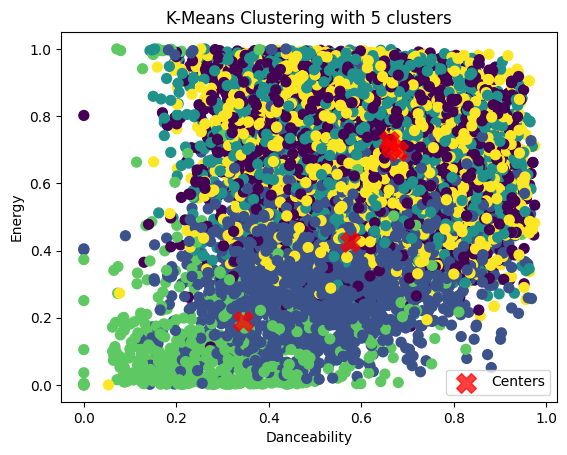

In [677]:
# Plotting the data point with the cluster assignments
plt.scatter(C['Danceability'], C['Energy'], c=kmeans.labels_, s=50, cmap = 'viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c= 'red', s= 200, alpha = 0.75, marker = 'X', label = "Centers")
plt.xlabel('Danceability')
plt.ylabel('Energy')
plt.title("K-Means Clustering with 5 clusters")
plt.legend()
plt.show()

##### This plot visualizes the K-Means clustering results on the Danceability and Energy columns, where each point is colored according to its assigned cluster. The red 'x' markers represent the cluster centroids, which indicate the center of each cluster. The plot provides a visual representation of how well the songs have been grouped based on their features.

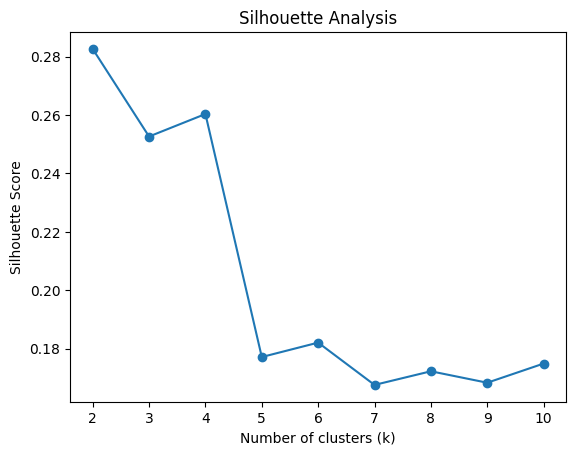

In [678]:
# Tune k-means clustering using different numbers of clusters (perhaps 2-11 clusters)
silhouette_scores = []

for k in range (2,11): #Silhouette score  is undefined for k=1
    kmeans= KMeans(n_clusters=k, random_state=30)
    kmeans.fit(C_scaled)
    score = silhouette_score(C_scaled, kmeans.labels_)
    silhouette_scores.append(score)

#Plot silhouette scores
plt.plot(range(2,11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')
plt.show()

##### Finding all artists in the same cluster as "Ashe" and performing another k-means within that cluster.

##### For Hierarchial clustering, I need to add the 'Artist' column and the cluster labels to the rows so that I can identify the cluser number for Ashe and then select all rows with the same cluster  number for the next level of clustering.
##### C stores numerical columns that I could use to cluster. It is a data frame object.C_scaled stores normalized columns from C. C_scaled is the output of the fit_transform method so C_scaled is the numpy array
##### df_cleaned contains all original columns, both categorical and numerical. I will use df_cleaned to obtain the Artist names.
##### The cluster names are stored in kmeans.labels_
##### So I will combine C, Artist names from df_cleaned, and kmeans.labels into one data frame. I use C instead of C_scaled because I need to be working with data frames to combine all columns.
##### I copy C into another data frame variable results because I want to keep X the same so when I re-run the code , the code still works. If I simply add artist names and labels back  to C, C  will contain a nonnumerical column (name) and so scaler.fit_transform(C) will have errors.

In [679]:
#Adding the 'artist' column  and cluster labels back to the DataFrame
results = C.copy() #make a copy of C so we don't change  C

#Get the cluster Labels
labels= kmeans.labels_ # labels attribute stores the cluster assignment  for each row
results['cluster'] = labels # add the clustering numbers column to the  results dataframe

results['Artist'] = df_cleaned[['Artist']] # getting the Artist names for all rows from df_cleaned and add this column to results data frame.

In [680]:
type(results)

pandas.core.frame.DataFrame

In [681]:
results.columns

Index(['Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Likes', 'Views', 'Comments',
       'Stream', 'Duration_ms', 'Liveness', 'Tempo', 'cluster', 'Artist'],
      dtype='object')

In [682]:
target_name = 'Ashe' # We are searching for artist name who are in the same cluster as Ashe
cluster_number = results[results['Artist'] == target_name] ['cluster'].values

if cluster_number.size > 0:
    target_cluster = cluster_number[0]
    print(f"The cluster number for {target_name} is {target_cluster}")
else:
    print(f"{target_name} not found in the Dataframe.")

The cluster number for Ashe is 7


In [683]:
Ashe_df = results[results['cluster'] == 7]

In [684]:
Ashe_df.shape

(2191, 16)

In [685]:
# Filter the artists in the same cluster
samecluster_artists = results[results['cluster'] == target_cluster][['Artist', 'Danceability', 'Energy', 'Key', 'Loudness', 'Speechiness',
       'Acousticness', 'Instrumentalness', 'Likes', 'Views', 'Comments',
       'Stream', 'Duration_ms', 'Liveness', 'Tempo',]]

In [686]:
samecluster_artists.head(10)

,Artist,Danceability,Energy,Key,Loudness,Speechiness,Acousticness,Instrumentalness,Likes,Views,Comments,Stream,Duration_ms,Liveness,Tempo
139,Pharrell Williams,0.894,0.404,9.0,-5.913,0.1300,0.453,0.000002,433116.0,5.909504e+07,13530.0,1.141775e+08,236507.0,0.0801,102.009
144,Khalid,0.632,0.686,6.0,-7.665,0.2430,0.549,0.000000,2781127.0,6.324000e+08,34795.0,1.424963e+09,170770.0,0.2000,89.949
156,Shakira,0.687,0.361,10.0,-11.589,0.0792,0.350,0.000011,507258.0,1.517658e+08,20625.0,1.383608e+08,173133.0,0.1100,165.747
171,Nicky Jam,0.628,0.690,8.0,-5.830,0.0511,0.443,0.000000,4089045.0,1.381669e+09,96876.0,7.655612e+08,205907.0,0.1130,179.908
176,Nicky Jam,0.760,0.803,8.0,-2.867,0.0306,0.531,0.000000,435031.0,6.171156e+07,5375.0,3.738274e+07,223074.0,0.0555,136.945
185,The Beatles,0.686,0.127,7.0,-14.361,0.0342,0.754,0.000014,365297.0,3.385295e+07,4522.0,3.267332e+08,138387.0,0.0573,93.699
186,The Beatles,0.688,0.435,9.0,-11.359,0.0323,0.449,0.000000,463315.0,6.322312e+07,8607.0,2.664266e+08,146333.0,0.1130,103.239
203,Sean Paul,0.741,0.824,10.0,-4.143,0.0352,0.614,0.000000,1324227.0,2.085732e+08,20700.0,3.811556e+08,211666.0,0.1580,100.216
215,Elvis Presley,0.358,0.387,7.0,-14.342,0.0324,0.746,0.012100,152547.0,1.298218e+07,3757.0,1.264459e+08,218440.0,0.1190,181.183
274,ABBA,0.454,0.788,6.0,-6.748,0.0371,0.574,0.000766,512491.0,1.153803e+08,22130.0,2.950394e+08,294720.0,0.0859,126.150


In [687]:
#Using all columns in the DataFrame except 'Artist' and 'cluster' for clustering
features = results.drop(columns=['Artist', 'cluster'])  # Dropping non-numerical columns for silhouette score

In [688]:
# Standardizing the features before calculating the silhouette score
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [689]:
# Calculating silhouette score for the entire clustering result
sil_score = silhouette_score(scaled_features, results['cluster'])
print(f"Silhouette Score for the clustering: {sil_score}")

Silhouette Score for the clustering: 0.06758104822791346


##### The hierarchical clustering results were used to group artists based on their numerical features, such as musical characteristics and engagement metrics. After performing clustering, I identified which cluster the artist Ashe belongs to (cluster number 7), and then extracted all other artists in the same cluster. This allows for a deeper understanding of the similarities between Ashe and other artists in the same group.

##### The Silhouette Score was calculated for the entire clustering result.The score for this clustering is 0.0675 , suggesting that the clustering might not be highly distinct, but still provides some insight into the relationships between artists.